### 1. iris 데이터를 읽으세요.

In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
import pandas as pd


X = load_iris().data
y = load_iris().target
iris = pd.DataFrame(X)
iris.columns = load_iris().feature_names
iris['species'] = y

In [2]:
iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


### 2. 각 컬럼별 boxplot을 그리세요.

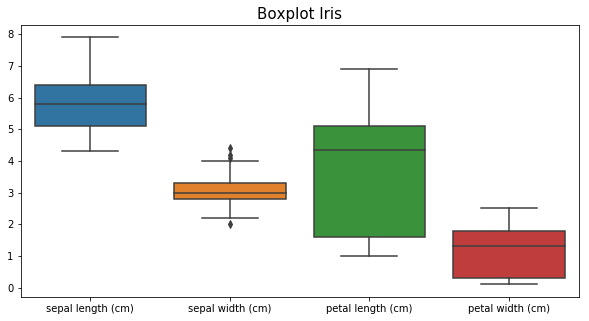

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
plt.title('Boxplot Iris', fontsize = 15)
sns.boxplot(data = iris[iris.columns[:-1]])
plt.show()

### 3. StandardScaler를 적용해주세요.
### 4. 훈련/테스트셋을 분리해주세요.

In [10]:
# 3번 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)


# 4번 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 13)


### 5. RandomForest에 standardsclaer를 적용한 pipeline으로 구성해두세요.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

estimators = [('scaler', StandardScaler()),
             ('RF', RandomForestClassifier(random_state = 13, n_estimators= 100, n_jobs = -1))]

pipe = Pipeline(estimators)
pipe

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('RF',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=13,
                                        verbose=0, warm_start=False))],
         verbose=False)

### 6.각 파이프라인에 gridsearch를 적용하세요.

In [12]:
from sklearn.model_selection import GridSearchCV

estimators = [('scaler', StandardScaler()),
             ('RF', RandomForestClassifier(max_depth = 2, random_state = 13))]

pipe = Pipeline(estimators)
param_grid = [{'RF__max_depth': [2, 4, 7, 10]}]

GridSearch = GridSearchCV(estimator = pipe, param_grid= param_grid, cv = 3)

scaled_X = pipe['scaler'].fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 13)

### 7. train 데이터의 결과를 DataFrame으로 정리해주세요.

In [13]:
GridSearch.fit(X_train, y_train)
train_df = pd.DataFrame(GridSearch.cv_results_)
train_df[['params','rank_test_score','mean_test_score','std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,{'RF__max_depth': 2},1,0.961905,0.035635
1,{'RF__max_depth': 4},4,0.942857,0.023328
2,{'RF__max_depth': 7},2,0.952381,0.013469
3,{'RF__max_depth': 10},2,0.952381,0.013469


### 8. 가장 좋은 모델을 test 데이터에 적용한 결과를 제시해주세요.

In [14]:
from sklearn.metrics import *
preds = GridSearch.best_estimator_.predict(X_test)
print('Test score with the best parameter: ',accuracy_score(y_test, preds))

Test score with the best parameter:  0.9555555555555556
